In [1]:
%pylab inline
import pandas as pd
import numpy as np
import tqdm
import glob
import os.path
import openslide
import cv2
import bio.liver as liver
import PIL

Populating the interactive namespace from numpy and matplotlib


In [ ]:
dpath = "/DATA/GDC/liver/slides"

In [ ]:
slide_files = { os.path.basename(fn).upper(): fn for fn in glob.glob(dpath + "*/*.svs") }

In [2]:
slides = pd.read_csv('../download/slides.csv')

In [ ]:
all_normal = slides.loc[slides.percent_normal_cells == 100]
all_tumor = slides.loc[slides.percent_tumor_cells]

In [6]:
y = slides.days_to_death.fillna(slides.days_to_last_follow_up)
slides = slides.loc[y.notnull()]
y = slides.days_to_death.dropna()


In [ ]:
y.describe()

In [ ]:
die_early = slides.loc[y < 180]
die_late = slides.loc[y>1500]


In [ ]:
#liver.plots_from_samples(slide_files, list(die_early.slide_file_name), level=1)

In [ ]:
liver.pull_zoom_samples(
    '/DATA/GDC/liver/slides/TCGA-2Y-A9H9-01A-02-TS2.18D7B9CF-79BB-470E-A0DC-A1306BD8DDE3.svs', 
    progress=tqdm.tqdm_notebook
)

In [ ]:
slide_fn = '/DATA/GDC/liver/slides/TCGA-2Y-A9H9-01A-02-TS2.18D7B9CF-79BB-470E-A0DC-A1306BD8DDE3.svs'
level = 2
slide = openslide.open_slide(slide_fn)
w, h = slide.level_dimensions[level]
w_0, h_0 = slide.level_dimensions[0]
tsize = 64

In [ ]:
cols = []
#for row in range()
for col in tqdm.tnrange(math.ceil(w/tsize)):
    rows = []
    for row in range(math.ceil(h/tsize)):
        x = int(col * tsize * w_0 / w)
        y = int(row * tsize * h_0 / h)
        pos = (x, y)
        #print(row,col)
        try:
            rgn = slide.read_region(pos, level, (tsize,tsize))
            arr = np.array(rgn)
        except:
            arr = np.zeros((tsize,tsize,4),dtype=uint8)
            arr[:,:,3] = 255
            slide.close()
            slide = openslide.open_slide(slide_fn)
        rows.append(arr)
    cols.append(np.vstack(rows))

img = np.hstack(cols)
img = PIL.Image.fromarray(img)

In [3]:
def get_tissue_map(slide):
    thumb = slide.associated_images['thumbnail']
    tile_rgba = np.array(thumb)
    gray = cv2.cvtColor(tile_rgba,cv2.COLOR_BGR2GRAY)
    _, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
    return thresh


In [13]:
def pull_level_slides(slide_fn, progress=tqdm.tqdm)
    max_empty=0.50

    slide = openslide.open_slide(slide_fn)
    tmap = get_tissue_map(slide)
    tmap_h, tmap_w = tmap.shape
    tile_size = 16
    tile_range = list(range(0,tmap_h, tile_size))

    tiles_0 = []
    tiles_1 = []

    count = 0
    for row in progress(tile_range):
        for col in range(0, tmap_w, tile_size):
            tile_width = min(tile_size, tmap_w - col)
            tile_height = min(tile_size, tmap_h - row)
            thresh_area = tmap[row:(row+tile_height), col:(col+tile_width)]
            area_sum = (thresh_area > -1).sum()
            if area_sum > 0:
                pct_empty = (thresh_area == 0).sum()/area_sum
                if pct_empty < max_empty:
                    def pull_tile(slide, level):
                        slide_0_w, slide_0_h = slide.level_dimensions[0]
                        slide_w, slide_h = slide.level_dimensions[level]
                        zoom_size = int(tile_size * slide_w / tmap_w)
                        x = int(col * slide_0_w / tmap_w)
                        y = int(row * slide_0_h / tmap_h)
                        try:
                            tile = slide.read_region((x,y), level, (zoom_size, zoom_size))
                        except:
                            slide.close()
                            slide = openslide.open_slide(slide_fn)
                            tile = None
                        return slide, tile

                    slide, tile_1 = pull_tile(slide, 1)
                    slide, tile_0 = pull_tile(slide, 0)
                    if not tile_1 is None:
                        tiles_1.append(tile_1)
                    if not tile_0 is None:
                        tiles_0.append(tile_0)
    slide.close()
    return tiles_0, tiles_1

HBox(children=(IntProgress(value=0, max=14), HTML(value='')))

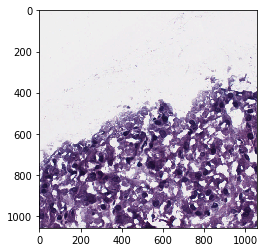

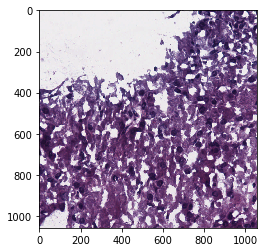

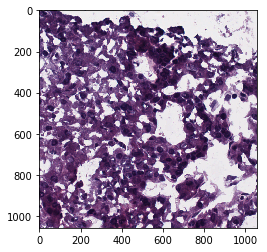

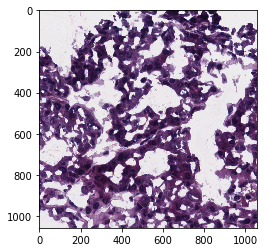

In [17]:
for t in tiles_0[0:4]:
    plt.imshow(t)
    plt.show()
    plt.tight_layout()

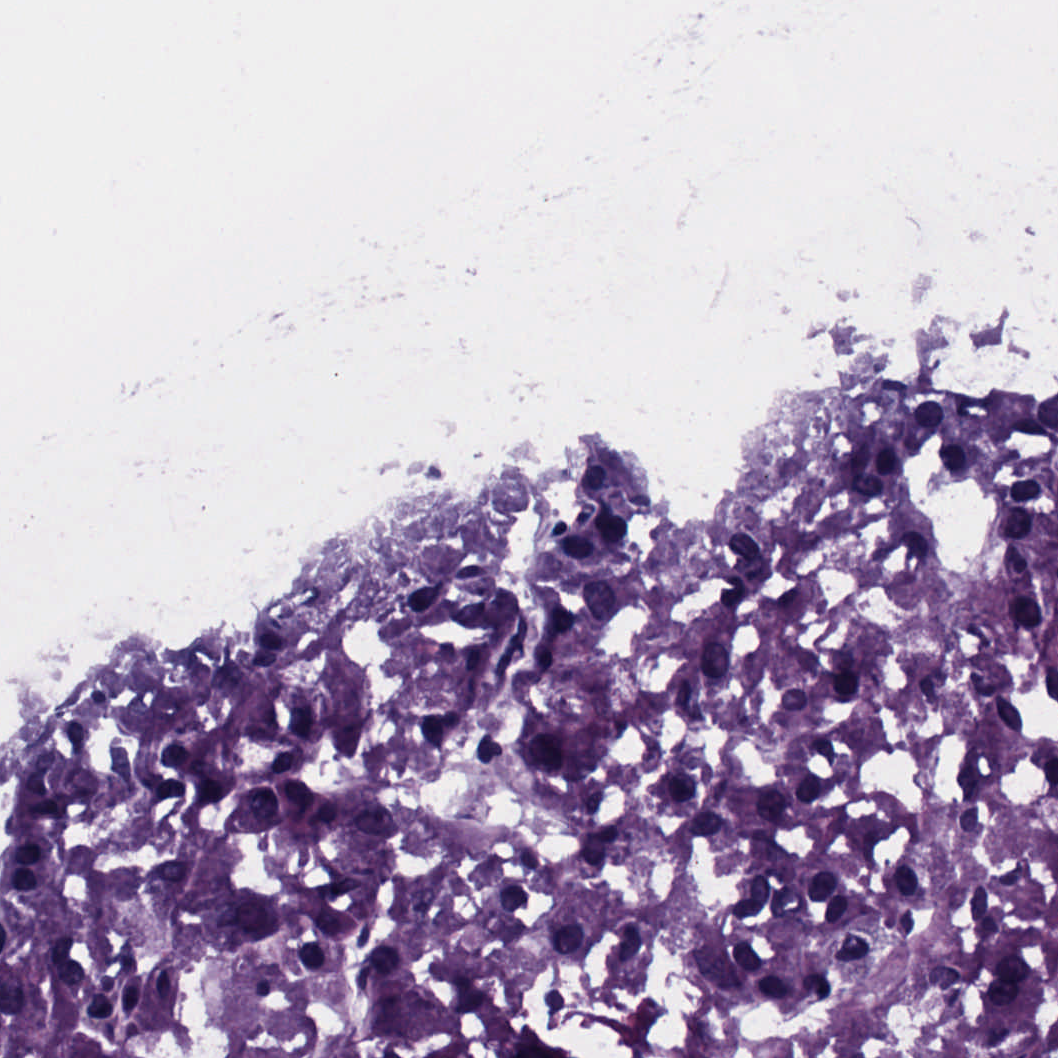

In [21]:
tiles_0[0]

In [ ]:
np.array(slide.dimensions) / thresh.size 

In [ ]:
tmap.shape

In [ ]:
thresh.shape

In [ ]:
14881/224

In [ ]:
67727/1024

In [ ]:
256/66

In [ ]:
self.p